In [77]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from rpca import RPCA

In [78]:
dataset = load_breast_cancer()
data = pd.DataFrame(np.concatenate((dataset.data, dataset.target.reshape(-1,1)), axis = 1), columns = list(dataset.feature_names)+['Target'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [79]:
X = dataset.data
X_norm = StandardScaler().fit_transform(X)

In [95]:
## Perform PCA and RPCA
# PCA
pca = PCA(n_components = 30)
pca.fit(X_norm)

# RPCA
rpca = RPCA()
L, S = rpca.fit(X_norm, verbose = (True, 25), imax = 10000)
r_pca = PCA(n_components = 30)
r_pca.fit(L)

Solution found after 1502 iterations


PCA(n_components=30)

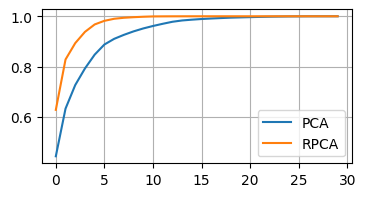

In [99]:
plt.figure(figsize = (4, 2))
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'PCA') 
plt.plot(np.cumsum(r_pca.explained_variance_ratio_), label = 'RPCA') 
plt.grid(); plt.legend(); plt.show()

In [113]:
pca = PCA(n_components = 3)
X_transformed_pca = pca.fit_transform(X_norm)

r_pca = PCA(n_components = 3)
X_transformed_rpca = r_pca.fit_transform(L)

df_pca =  pd.DataFrame(np.concatenate((X_transformed_pca,  dataset.target.reshape(-1,1)), axis = 1), columns = ['PC1','PC2','PC3','Target'])
df_rpca = pd.DataFrame(np.concatenate((X_transformed_rpca, dataset.target.reshape(-1,1)), axis = 1), columns = ['PC1','PC2','PC3','Target'])

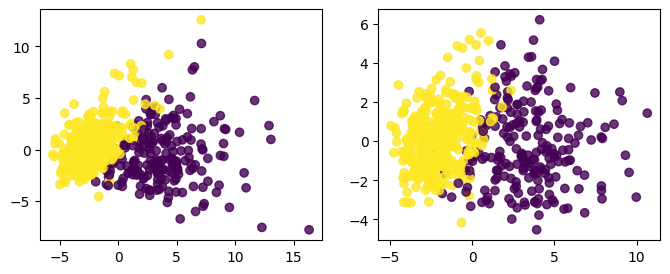

In [114]:
_, axs = plt.subplots(1, 2, figsize = (8, 3))
axs[0].scatter(df_pca.PC1, df_pca.PC2, c = df_pca.Target, alpha = 0.8)
axs[1].scatter(df_rpca.PC1, df_rpca.PC2, c = df_rpca.Target, alpha = 0.8)

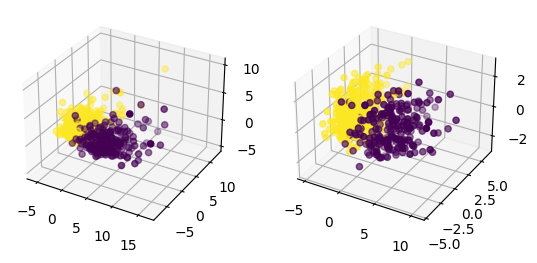

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(121, projection = '3d')
ax.scatter(df_pca.PC1, df_pca.PC2, df_pca.PC3, c = df_pca.Target)

ax = fig.add_subplot(122, projection = '3d')
ax.scatter(df_rpca.PC1, df_rpca.PC2, df_rpca.PC3, c = df_rpca.Target)

plt.show()


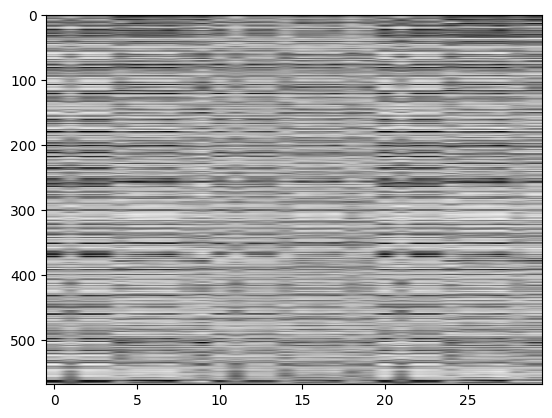

In [121]:
plt.imshow(L, aspect = 'auto', cmap = 'Greys', vmin = -2, vmax = 2)

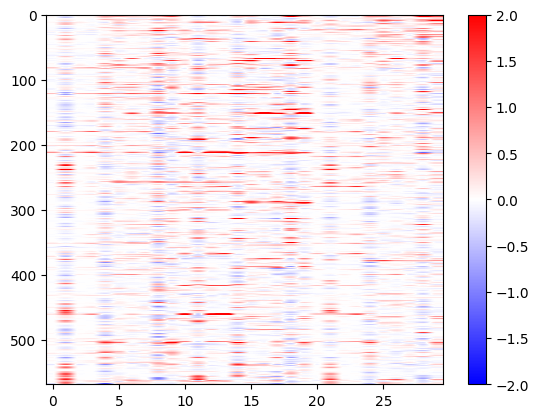

In [124]:
im  = plt.imshow(S, aspect = 'auto', cmap = 'bwr', vmin = -2, vmax = 2); plt.colorbar(im)